# LEAD SCORING CASE STUDY

## PROBLEM STATEMENT

- X Education sells online courses and gets leads through website visits, referrals, and form submissions. 
- They have a typical lead conversion rate of 30%, but wish to identify "Hot Leads" to increase conversion rate. By focusing on potential leads, the sales team can communicate more effectively and convert more leads into paying customers. 
- Effective lead nurturing is key in converting potential leads.

# BUSINESS GOAL

- The CEO of X Education has tasked a consultant with building a lead scoring model to identify potential leads with higher conversion rates. 
- The goal is to increase the conversion rate to 80%. The model will assign a lead score to each lead to determine their conversion likelihood.

## STEP 1 : Reading and Understand the Data

In [1]:
#We begin by importing the necessary libraries. We also import the warnings that are essential.

# Visualisation libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning libraries

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
# Loading the dataset into the Notebook
df= pd.read_csv('Leads.csv')

In [3]:
# Checking the head of the dataset

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Now, we inspect the various aspects of the bike dataframe.

In [4]:
#satistical Summary of the Dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As it can be observed from the above analysis that the dataset has columns of the following datatypes:

- float64 : 4
- int64 : 3
- object : 30

In [6]:
# Analyse the shape of the dataset.

df.shape

(9240, 37)

The dataset has the following shape:

- 9240 rows
- 37 columns

### Data Cleaning

In [7]:
# Checking for Null values

df.isnull().sum()*100/df.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Here, the "Select" group which is present in many categorical columns, has to be convert thated with NaN. (i.e. null values)

In [8]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('Select', np.nan)

In [9]:
# Null values Percentage in the Dataframe
round(df.isnull().sum()/len(df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Dropping columns which has Null value precentage >=40%.

cols = df.columns

for i in cols:
    if ((100*(df[i].isnull().sum()/len(df.index))) >= 40):
        df.drop(i, 1, inplace = True)

In [11]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [12]:
df.shape

(9240, 30)

In [13]:
# removing the column Prospect ID; Lead Number is a unique value already
df = df.drop('Prospect ID', axis=1)

In [14]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


### Analysis of the Categorical Columns

In [15]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
cat_cols = ['Country', 'City', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Source', 'Last Activity']

In [17]:
df['Country'].value_counts(normalize = True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [18]:
# Since,around 95% of the vlaues are 'India', we drop this column.

df.drop(['Country'], axis = 1, inplace = True)

In [19]:
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
df['City'].mode()

0    Mumbai
Name: City, dtype: object

In [21]:
#Here, we replace the null values with 'Mumbai'.

df['City'] = df['City'].replace(np.nan, 'Mumbai')
df['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [23]:
# Since this is an important column, we replace the Null value here as 'Not Selected'.

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Selected')

In [24]:
# Since most Fields are under Management Studies in Specialization we group them together.

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'] ,'Management_Specializations')  

In [25]:
cat_cols_1 = ['What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Source', 'Last Activity']

In [26]:
# The following code will help us get insight on the categorical columns.

for c in cat_cols_1:
    print(df[c].value_counts())
    print("-"*60)
    print(df[c].value_counts(normalize= True))
    print("*"*60)
    print("Null Values: ", df[c].isnull().sum())
    print(df[c].mode()[0])
    print("="*60)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
------------------------------------------------------------
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64
************************************************************
Null Values:  2690
Unemployed
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
------------------------------------------------------------
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to 

In [27]:
# We will use the mode of the variables to fill the null values in these columns.

df["What is your current occupation"].fillna(df["What is your current occupation"].mode()[0], inplace = True)

df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0], inplace = True)

df['Lead Source'].fillna(df['Lead Source'].mode()[0], inplace = True)

df['Lead Source'] = df['Lead Source'].replace(['bing', 'Click2call', 'Press_Release', 'youtubechannel', 'welearnblog_Home', 'WeLeaen', 'blog', 'Pay per Click Ads', 'testone', 'NC_EDM'], 'Others')

df['Last Activity'].fillna(df['Last Activity'].mode()[0], inplace = True)

df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',       'Email Marked Spam',                  'Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed','Email Bounced',                                                                    'Resubscribed to emails','View in browser link Clicked','Approached upfront', 'Form Submitted on Website', 'Email Received'],'Other_Notable_activity')

In [28]:
# Since 'Tags' is an important column, we replace the Null values here as 'Not Selected'.

df['Tags'] = df['Tags'].replace(np.nan, 'Not Selected')

#replacing tags with low frequency with "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized''switched off', 'Already a student', 'Not doing further education','invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')

In [29]:
# Checking the columns with flag values.

cat_cols_2 = ['Do Not Call', 'Do Not Email', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

In [30]:
# The following code will help us get insight on the categorical columns.

for c in cat_cols_2:
    print(df[c].value_counts())
    print("-"*60)
    print(df[c].value_counts(normalize= True))
    print("*"*60)
    print("Null Values: ", df[c].isnull().sum())
    print(df[c].mode()[0])
    print("="*60)

No     9238
Yes       2
Name: Do Not Call, dtype: int64
------------------------------------------------------------
No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64
************************************************************
Null Values:  0
No
No     8506
Yes     734
Name: Do Not Email, dtype: int64
------------------------------------------------------------
No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64
************************************************************
Null Values:  0
No
No     9226
Yes      14
Name: Search, dtype: int64
------------------------------------------------------------
No     0.998485
Yes    0.001515
Name: Search, dtype: float64
************************************************************
Null Values:  0
No
No    9240
Name: Magazine, dtype: int64
------------------------------------------------------------
No    1.0
Name: Magazine, dtype: float64
************************************************************
Null Values:  0


In [31]:
#Now we go ahead and drop the columns with huge data imbalances.

df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [32]:
round(df.isnull().sum()/len(df)*100,2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Tags                                             0.00
City                                             0.00
A free copy of Mastering The Interview           0.00
Last Notable Activity                            0.00
dtype: float64

In [33]:
# We go ahead with dropping the rows that have null values, since the null value percentags are less than 1.5%.

df = df.dropna()

In [34]:
round(df.isnull().sum()/len(df)*100,2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

#### INSIGHT ON NUMERICAL COLUMNS

In [35]:
num_cols = ['TotalVisits', 'Converted', 'Total Time Spent on Website', 'Page Views Per Visit']

In [36]:
# The following code will help us get insight on the numerical columns.
for i in num_cols:
    print("Null Values: ", df[i].isnull().sum())
    print(df[i].skew())
    print("="*60)

Null Values:  0
19.911657340056202
Null Values:  0
0.49363949301407256
Null Values:  0
0.9748761640674386
Null Values:  0
2.8717928965664092


### HANDLING OUTLIERS

The common approaches that are used to treat outliers in a dataset are as follows:

- Imputation of values
- Deletion of the outliers
- Binning of values
- Capping the outliers

In this dataset, in order to identify if the dataset has outliers we will be using boxplots.

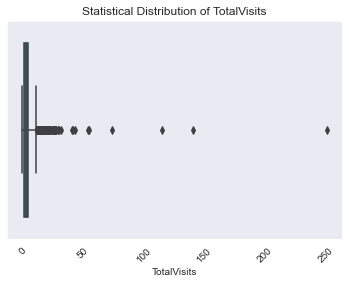

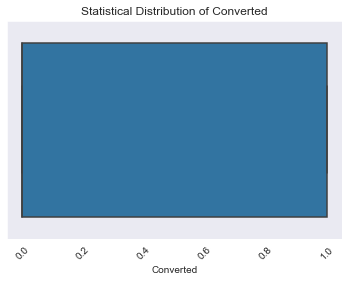

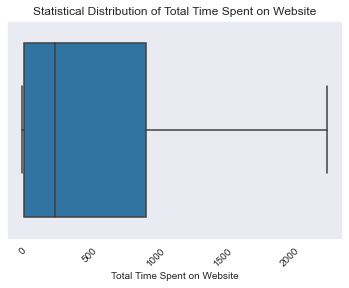

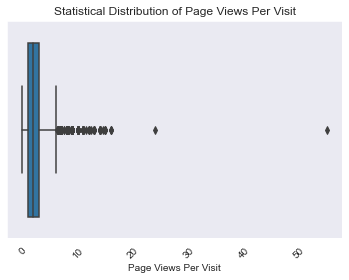

In [37]:
sns.set_style("dark")
for i in num_cols:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.title("Statistical Distribution of "+i)
    plt.xticks(rotation=45)
    plt.show()

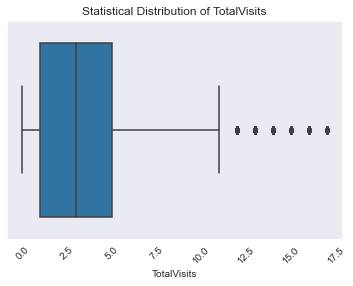

In [38]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

cols_to_treat = ['TotalVisits', 'Page Views Per Visit']

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(df['TotalVisits'])
plt.xlabel('TotalVisits')
plt.title("Statistical Distribution of TotalVisits")
plt.xticks(rotation=45)
plt.show()

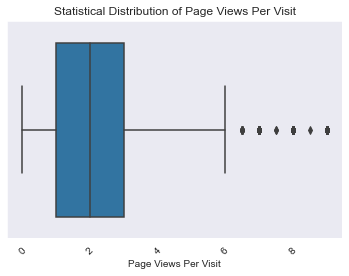

In [39]:
Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[(df['Page Views Per Visit']<= Q3)]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[(df['Page Views Per Visit']>= Q1)]
sns.boxplot(df['Page Views Per Visit'])
plt.xlabel('Page Views Per Visit')
plt.title("Statistical Distribution of Page Views Per Visit")
plt.xticks(rotation=45)
plt.show()

## STEP 2: Visualising the Data

# Univariate  Analysis

### Categorical Variables

In [40]:
object_cols = df.select_dtypes(include=['object']).columns

In [41]:
object_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

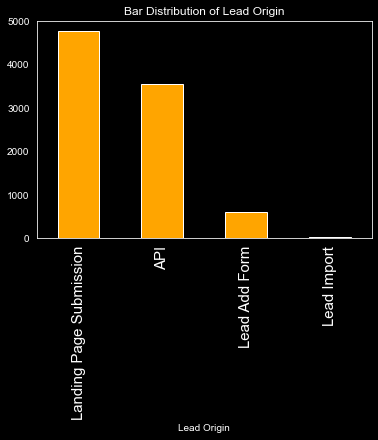

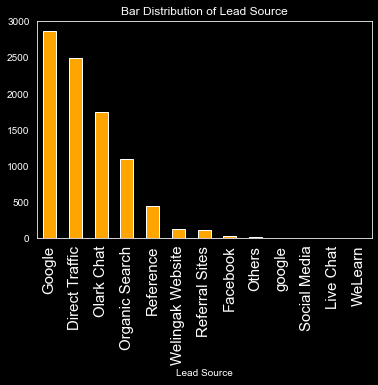

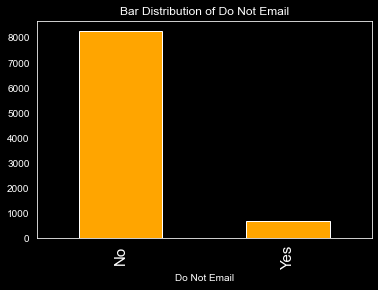

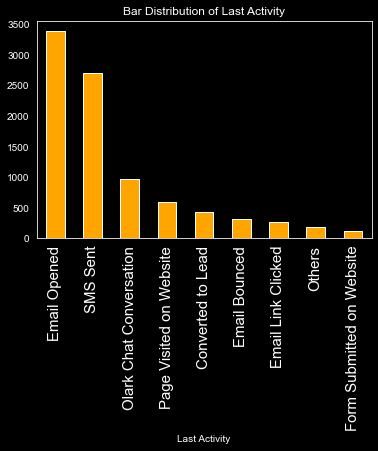

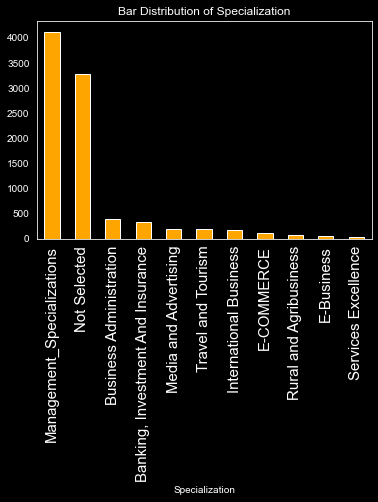

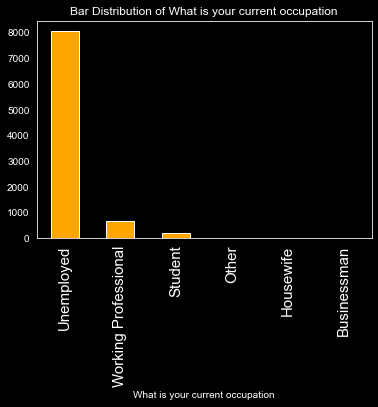

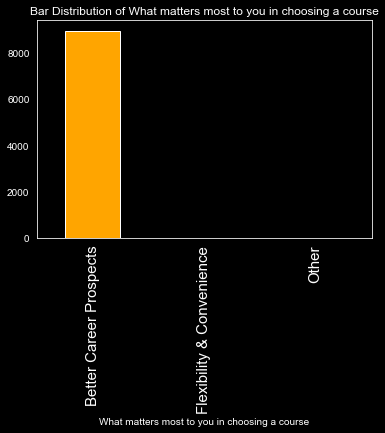

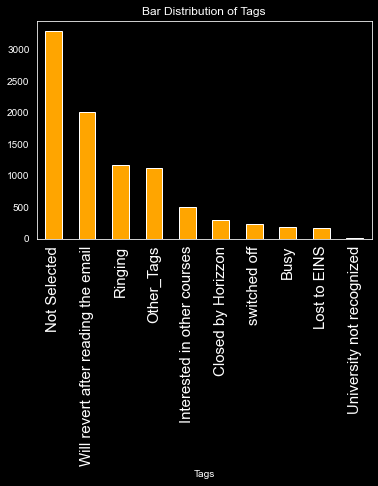

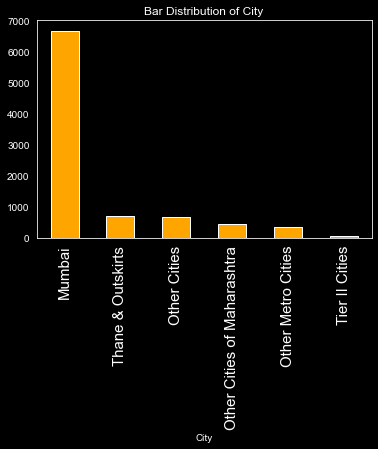

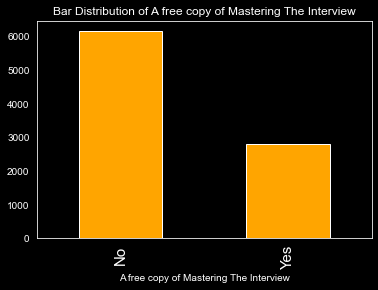

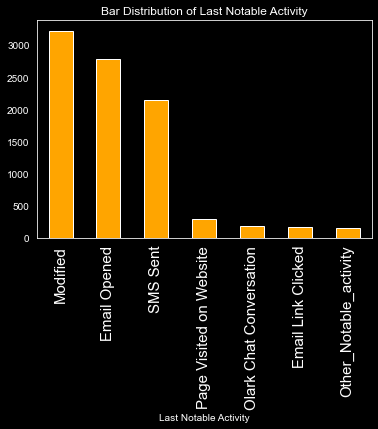

In [42]:
plt.style.use("dark_background")

for i in object_cols:
    df[i].value_counts().plot(kind = 'bar', color = 'orange')
    plt.xticks(rotation=90, fontsize = 15)
    plt.xlabel(i)
    plt.title("Bar Distribution of "+i)
    plt.show()

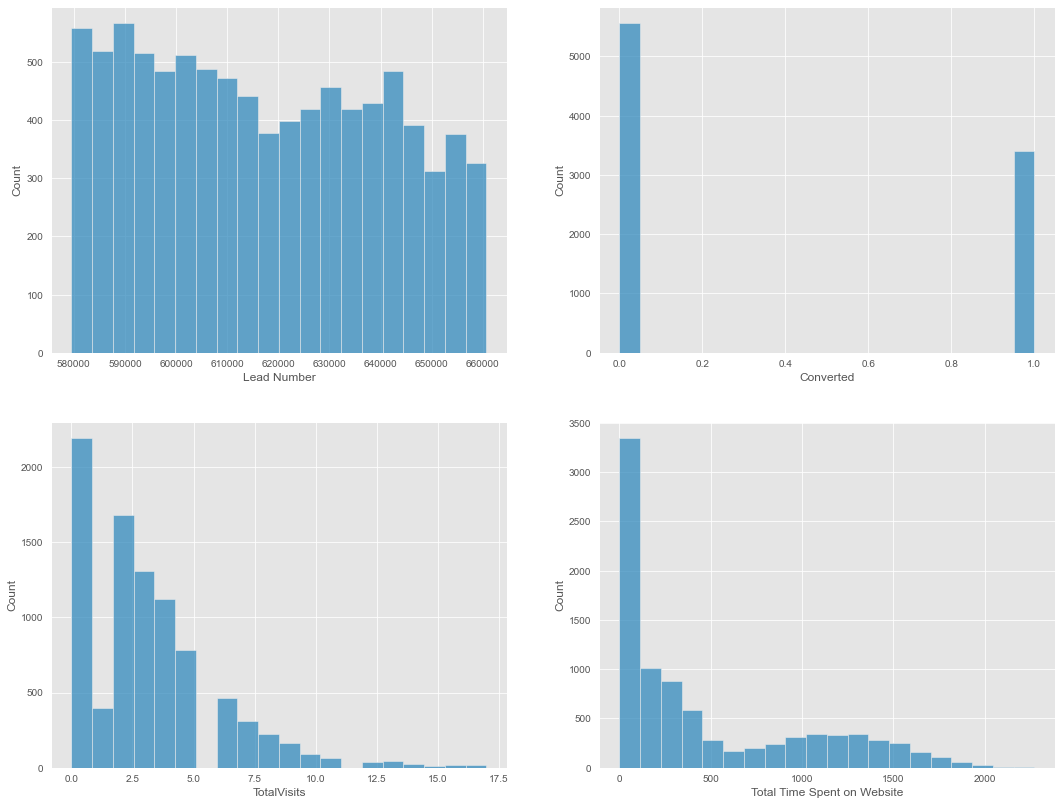

In [43]:
# Univariate Analysis of numeric variables
var_list_1 = ['Lead Number', 'Converted', 'TotalVisits','Total Time Spent on Website']

plt.style.use("ggplot")
fig, axes = plt.subplots(2,2, figsize = (18,14))
sns.histplot(ax= axes[0,0], data= df['Lead Number'], bins= 20)
sns.histplot(ax= axes[0,1], data= df['Converted'], bins= 20)
sns.histplot(ax= axes[1,0], data= df['TotalVisits'], bins= 20)
sns.histplot(ax= axes[1,1], data= df['Total Time Spent on Website'], bins= 20)
plt.show()

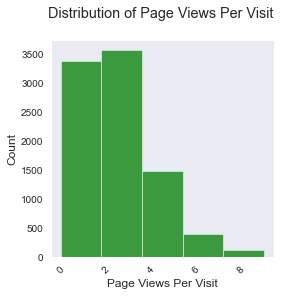

In [44]:
# Analysis of the 'Page Views Per Visit' column using HISTOGRAM.

sns.set_style("dark")
plt.figure(figsize= [4,4])
sns.histplot(df['Page Views Per Visit'], bins = 5,  color='g')
plt.xlabel("Page Views Per Visit")
plt.title("Distribution of Page Views Per Visit \n")
plt.xticks(rotation=45)
plt.show()

## Bi - Variate Analysis

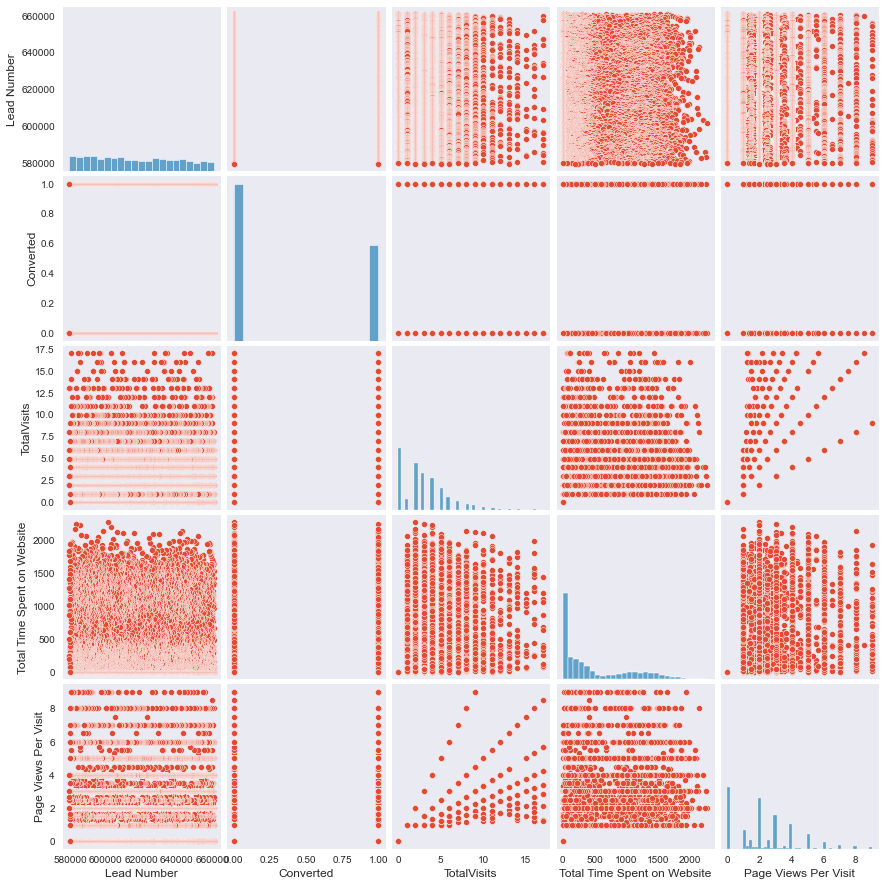

In [45]:
# Visualing the numeric variables.

var_list = df[['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
sns.pairplot(var_list)
plt.show()

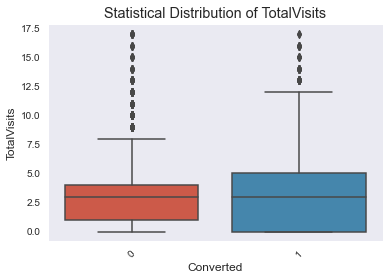

In [46]:
# Analysing the 'Converted' variable with the other numeric variables.


sns.boxplot(x = df.Converted, y = df['TotalVisits'])
plt.title("Statistical Distribution of TotalVisits")
plt.xticks(rotation=45)
plt.show()

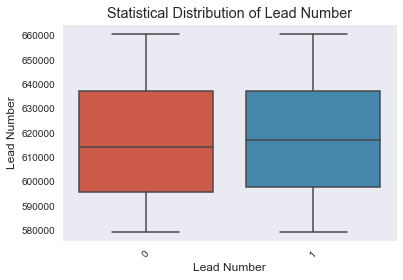

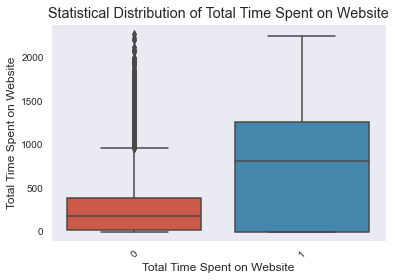

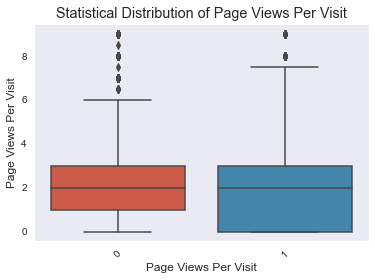

In [47]:
var_list_1 = ['Lead Number', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in var_list_1:
    sns.boxplot(x = df.Converted, y = df[i])
    plt.xlabel(i)
    plt.title("Statistical Distribution of "+i)
    plt.xticks(rotation=45)
    plt.show()

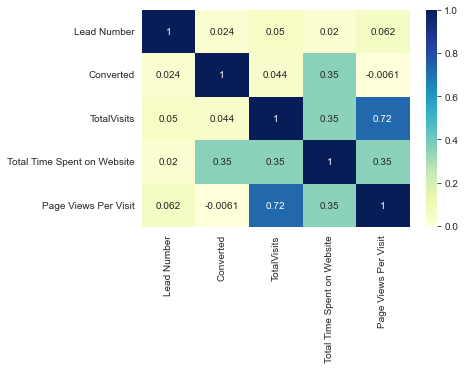

In [48]:
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

## STEP 3 : Data Preparation

In [49]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Selected,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Selected,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Modified


- It can be seen that the dataset has columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [50]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list

df[varlist] = df[varlist].apply(binary_map)

### DUMMY VARIABLES

In [51]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [52]:
dummy = pd.get_dummies(df[['Lead Origin', 'Do Not Email','What is your current occupation','A free copy of Mastering The Interview', 'What matters most to you in choosing a course', 'City']], drop_first=True)

# Adding the results to the master dataframe
Leads = pd.concat([df, dummy], axis=1)

In [53]:
dummy = pd.get_dummies(Leads['Tags'], prefix = 'Tags')
dummy = dummy.drop(['Tags_Not Selected'], 1)
Leads = pd.concat([Leads, dummy], axis = 1)

dummy = pd.get_dummies(Leads['Specialization'], prefix = 'Specialization')
dummy = dummy.drop(['Specialization_Not Selected'], 1)
Leads = pd.concat([Leads, dummy], axis = 1)

dummy = pd.get_dummies(Leads['Lead Source'], prefix = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
Leads = pd.concat([Leads, dummy], axis = 1)

dummy = pd.get_dummies(Leads['Last Activity'], prefix = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
Leads = pd.concat([Leads, dummy], axis = 1)

dummy = pd.get_dummies(Leads['Last Notable Activity'], prefix = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
Leads = pd.concat([Leads, dummy], axis = 1)

In [54]:
Leads = Leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','What is your current occupation','A free copy of Mastering The Interview', 'City', 'Tags', 'Specialization', 'Last Notable Activity', 'What matters most to you in choosing a course'], 1)

In [55]:
Leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [56]:
# Putting feature variable to X
X = Leads.drop(['Converted','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [57]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=350)

### Rescaling the Features 


There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use MinMax scaling.

In [59]:
scaler = MinMaxScaler()


X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5647,0.235294,0.566901,0.444444,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
8449,0.294118,0.462148,0.277778,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1414,0.235294,0.048415,0.222222,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
8927,0.117647,0.382923,0.222222,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3115,0.411765,0.176937,0.777778,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


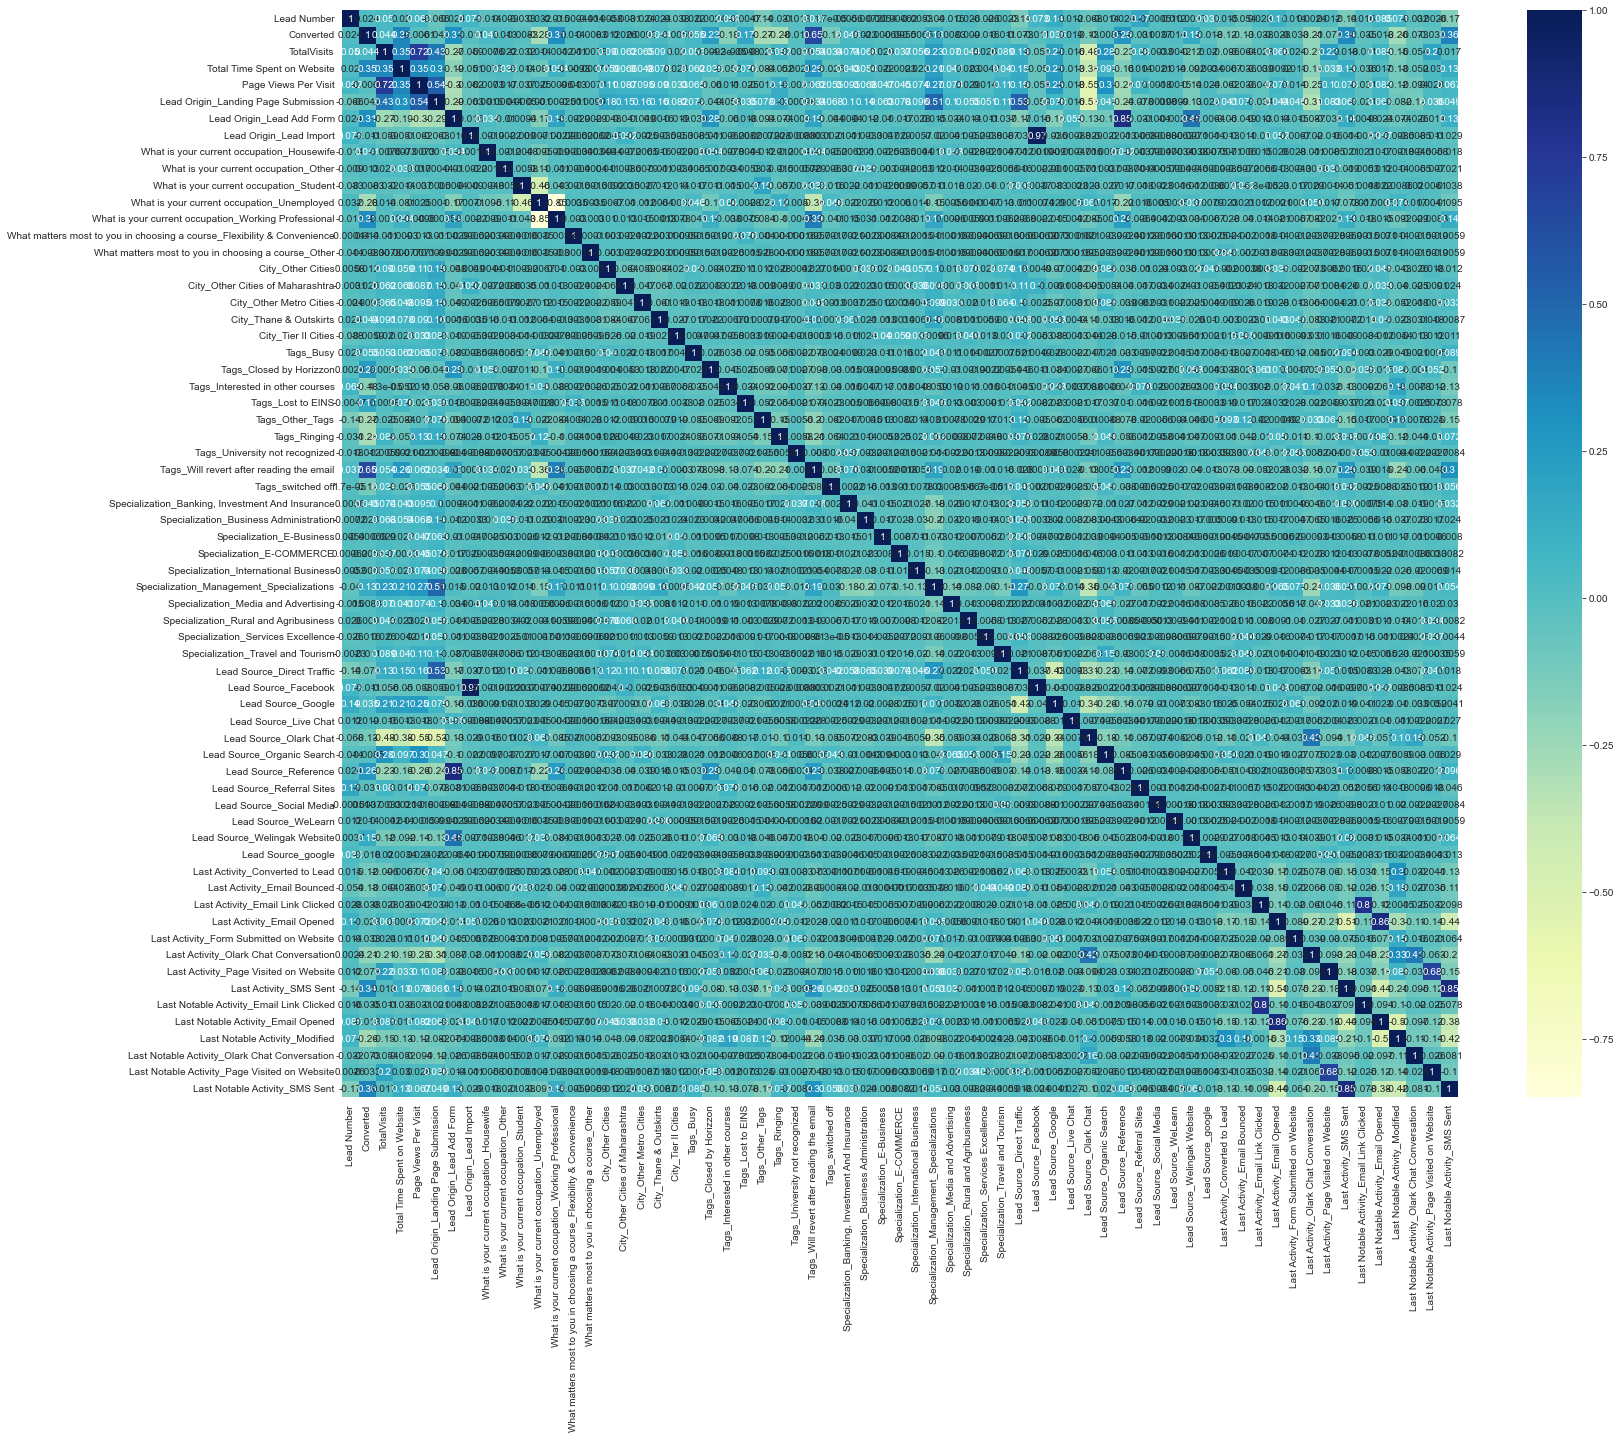

In [60]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = (25, 20))
sns.heatmap(Leads.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [61]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Number                                                              8953 non-null   int64  
 1   Converted                                                                8953 non-null   int64  
 2   TotalVisits                                                              8953 non-null   float64
 3   Total Time Spent on Website                                              8953 non-null   int64  
 4   Page Views Per Visit                                                     8953 non-null   float64
 5   Lead Origin_Landing Page Submission                                      8953 non-null   uint8  
 6   Lead Origin_Lead Add Form                                               

## Step 5: Model Building

### Model-1

In [62]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6204
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Mar 2023   Deviance:                       39236.
Time:                        14:47:26   Pearson chi2:                 1.92e+18
No. Iterations:                    27   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -4.398e+14   3.55e+07  -1.24e+07      0.000    -4.4e+14    -4.4e+14
TotalVisits                                                              5.112e+14   7.78e+06   6.57e+07      0.000    5.11e+14    5.11e+14
Total Time Spent on Website                                              2.184e+15   4.33e+06   5.04e+08      0.000    2.18e+15    2.18e+15
Page Views Per Visit                                                    -1.356e+14   6.93e+06  -1.96e+07      0.000   -1.36e+14   -1.36e+14
Lead Origin_Landing Page Submission                                      -2.18e+14   3.45e+06  -6.31e+07      0.000   -2.18e+14   -2.18e+14
Lead Origin_Lead Add Form                                                2.755e+15   1.46e+07   1.89e+08      0.000    2.76e+15    2.76e+15
Lead Origin_Lead Import                                                 -1.838e+15   6.72e+07  -2.73e+07      0.000   -1.84e+15   -1.84e+15
What is your current occupation_Housewife                               -1.703e+14   4.28e+07  -3.98e+06      0.000    -1.7e+14    -1.7e+14
What is your current occupation_Other                                   -5.052e+14   3.96e+07  -1.28e+07      0.000   -5.05e+14   -5.05e+14
What is your current occupation_Student                                  1.073e+15   3.08e+07   3.49e+07      0.000    1.07e+15    1.07e+15
What is your current occupation_Unemployed                               8.153e+12   3.02e+07    2.7e+05      0.000    8.15e+12    8.15e+12
What is your current occupation_Working Professional                     9.243e+14   3.04e+07   3.04e+07      0.000    9.24e+14    9.24e+14
What matters most to you in choosing a course_Flexibility & Convenience    -2.7410   2.78e-07  -9.86e+06      0.000      -2.741      -2.741
What matters most to you in choosing a course_Other                     -8.364e+14   6.73e+07  -1.24e+07      0.000   -8.36e+14   -8.36e+14
City_Other Cities                                                       -2.114e+14   3.43e+06  -6.16e+07      0.000   -2.11e+14   -2.11e+14
City_Other Cities of Maharashtra                                         2.099e+14   4.14e+06   5.07e+07      0.000     2.1e+14     2.1e+14
City_Other Metro Cities                                                 -4.083e+14   4.51e+06  -9.05e+07      0.000   -4.08e+14   -4.08e+14
City_Thane & Outskirts                                                   4.842e+13   3.29e+06   1.47e+07      0.000    4.84e+13    4.84e+13
City_Tier II Cities                                                      4.553e+14    9.1e+06      5e+07      0.000    4.55e+14    4.55e+14
Tag

### Model-2

In [63]:
logreg = LogisticRegression()

In [64]:
rfe = RFE(logreg, n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [65]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('What is your current occupation_Housewife', False, 36),
 ('What is your current occupation_Other', False, 45),
 ('What is your current occupation_Student', False, 35),
 ('What is your current occupation_Unemployed', False, 17),
 ('What is your current occupation_Working Professional', False, 4),
 ('What matters most to you in choosing a course_Flexibility & Convenience',
  False,
  49),
 ('What matters most to you in choosing a course_Other', False, 47),
 ('City_Other Cities', False, 43),
 ('City_Other Cities of Maharashtra', False, 32),
 ('City_Other Metro Cities', False, 23),
 ('City_Thane & Outskirts', False, 40),
 ('City_Tier II Cities', False, 5),
 ('Tags_Busy', False, 13),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Interested in other 

In [66]:
col = X_train.columns[rfe.support_]

In [67]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Tags_Busy', 'Tags_University not recognized',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Ad

##### Assessing the model with StatsModels

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1201.4
Date:                Mon, 20 Mar 2023   Deviance:                       2402.8
Time:                        14:47:30   Pearson chi2:                 9.13e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6111
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7197      0.113    -15.265      0.000      -1.940      -1.499
Total Time Spent on Website                       3.8644      0.236     16.407      0.000       3.403       4.326
Page Views Per Visit                             -1.8149      0.302     -6.011      0.000      -2.407      -1.223
Lead Origin_Lead Add Form                         1.2548      0.488      2.570      0.010       0.298       2.212
Tags_Closed by Horizzon                           7.0822      1.021      6.937      0.000       5.081       9.083
Tags_Interested in other courses                 -1.9261      0.381     -5.056      0.000      -2.673      -1.179
Tags_Lost to EINS                                 5.9176      0.729      8.123      0.000       4.490       7.346
Tags_Other_Tags                                  -2.5981      0.254    -10.238      0.000      -3.096      -2.101
Tags_Ringing                                     -3.7879      0.259    -14.639      0.000      -4.295      -3.281
Tags_Will revert after reading the email          4.4977      0.193     23.287      0.000       4.119       4.876
Tags_switched off                                -5.1565      1.021     -5.053      0.000      -7.157      -3.156
Lead Source_Welingak Website                     24.5344    1.8e+04      0.001      0.999   -3.52e+04    3.53e+04
Last Activity_SMS Sent                            1.2777      0.225      5.677      0.000       0.837       1.719
Last Notable Activity_Modified                   -1.3437      0.152     -8.852      0.000      -1.641      -1.046
Last Notable Activity_Olark Chat Conversation    -1.5308      0.443     -3.458      0.001      -2.398      -0.663
Last Notable Activity_SMS Sent                    1.0297      0.262      3.934      0.000       0.517       1.543
=================================================================================================================
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.46
15,Last Notable Activity_SMS Sent,5.01
12,Last Activity_SMS Sent,4.38
3,Lead Origin_Lead Add Form,1.75
9,Tags_Will revert after reading the email,1.58
13,Last Notable Activity_Modified,1.51
1,Total Time Spent on Website,1.32
11,Lead Source_Welingak Website,1.32
2,Page Views Per Visit,1.29
8,Tags_Ringing,1.24


In [70]:
# Dropping column with high p-value.

col = col.drop('Lead Source_Welingak Website',1)

### Model-3

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1215.3
Date:                Mon, 20 Mar 2023   Deviance:                       2430.7
Time:                        14:47:30   Pearson chi2:                 1.17e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6093
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6980      0.112    -15.176      0.000      -1.917      -1.479
Total Time Spent on Website                       3.8726      0.236     16.404      0.000       3.410       4.335
Page Views Per Visit                             -1.7895      0.301     -5.944      0.000      -2.380      -1.199
Lead Origin_Lead Add Form                         2.9811      0.337      8.850      0.000       2.321       3.641
Tags_Closed by Horizzon                           6.8667      1.018      6.743      0.000       4.871       8.863
Tags_Interested in other courses                 -1.9964      0.381     -5.233      0.000      -2.744      -1.249
Tags_Lost to EINS                                 5.8942      0.729      8.088      0.000       4.466       7.322
Tags_Other_Tags                                  -2.6499      0.253    -10.464      0.000      -3.146      -2.154
Tags_Ringing                                     -3.9914      0.267    -14.950      0.000      -4.515      -3.468
Tags_Will revert after reading the email          4.4234      0.192     23.057      0.000       4.047       4.799
Tags_switched off                                -5.1715      1.021     -5.067      0.000      -7.172      -3.171
Last Activity_SMS Sent                            1.2708      0.223      5.701      0.000       0.834       1.708
Last Notable Activity_Modified                   -1.3552      0.150     -9.007      0.000      -1.650      -1.060
Last Notable Activity_Olark Chat Conversation    -1.5450      0.440     -3.508      0.000      -2.408      -0.682
Last Notable Activity_SMS Sent                    1.0164      0.260      3.913      0.000       0.507       1.526
=================================================================================================================
"""

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.44
14,Last Notable Activity_SMS Sent,5.01
11,Last Activity_SMS Sent,4.38
9,Tags_Will revert after reading the email,1.51
12,Last Notable Activity_Modified,1.51
3,Lead Origin_Lead Add Form,1.40
1,Total Time Spent on Website,1.31
2,Page Views Per Visit,1.29
8,Tags_Ringing,1.23
4,Tags_Closed by Horizzon,1.20


In [73]:
#Dropping the variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent', 1)

### Model-4 : FINAL MODEL

In [74]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1223.1
Date:                Mon, 20 Mar 2023   Deviance:                       2446.3
Time:                        14:47:30   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6084
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5878      0.106    -14.931      0.000      -1.796      -1.379
Total Time Spent on Website                       3.8458      0.235     16.354      0.000       3.385       4.307
Page Views Per Visit                             -1.8670      0.297     -6.276      0.000      -2.450      -1.284
Lead Origin_Lead Add Form                         2.9158      0.336      8.672      0.000       2.257       3.575
Tags_Closed by Horizzon                           7.0798      1.020      6.943      0.000       5.081       9.078
Tags_Interested in other courses                 -1.9577      0.380     -5.153      0.000      -2.702      -1.213
Tags_Lost to EINS                                 6.0637      0.731      8.295      0.000       4.631       7.497
Tags_Other_Tags                                  -2.5988      0.250    -10.389      0.000      -3.089      -2.109
Tags_Ringing                                     -3.8487      0.261    -14.774      0.000      -4.359      -3.338
Tags_Will revert after reading the email          4.5059      0.195     23.123      0.000       4.124       4.888
Tags_switched off                                -5.0215      1.018     -4.932      0.000      -7.017      -3.026
Last Activity_SMS Sent                            2.0162      0.115     17.478      0.000       1.790       2.242
Last Notable Activity_Modified                   -1.7203      0.125    -13.736      0.000      -1.966      -1.475
Last Notable Activity_Olark Chat Conversation    -1.6529      0.442     -3.742      0.000      -2.519      -0.787
=================================================================================================================
"""

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.15
9,Tags_Will revert after reading the email,1.50
3,Lead Origin_Lead Add Form,1.40
1,Total Time Spent on Website,1.31
2,Page Views Per Visit,1.28
8,Tags_Ringing,1.23
12,Last Notable Activity_Modified,1.20
4,Tags_Closed by Horizzon,1.19
7,Tags_Other_Tags,1.17
11,Last Activity_SMS Sent,1.17


## STEP-6 : MODEL EVALUATION

- Since both p-values and VIFs seem decent for all variables, we go ahead and evaluate the model.

In [76]:
# Getting the predicted values on the train sets.

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5647    0.998139
8449    0.004723
1414    0.549778
8927    0.815512
3115    0.086321
9047    0.025618
2434    0.100214
3597    0.035295
8342    0.043435
873     0.004732
dtype: float64

In [77]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99813909, 0.00472314, 0.54977806, 0.81551154, 0.0863207 ,
       0.02561811, 0.10021435, 0.03529505, 0.04343522, 0.00473239])

### CREATION OF DATAFRAME CONTAINING THE ACTUAL CONVERSION FLAG AND THE PREDICTED PROBABILITIES

In [78]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.998139,5647
1,0,0.004723,8449
2,0,0.549778,1414
3,0,0.815512,8927
4,0,0.086321,3115


### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [79]:
y_train_pred_final['Predicted']= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x> 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.998139,5647,1
1,0,0.004723,8449,0
2,0,0.549778,1414,1
3,0,0.815512,8927,1
4,0,0.086321,3115,0


### METRICS EVALUATION

#### CONFUSION MARTIX

In [80]:
# Creation of Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3708  180]
 [ 272 2107]]


#### ACCURACY

In [81]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9278761767991064


#### OTHER METRICS

In [82]:
TP = confusion[1,1] #True Positive
TN = confusion[0,0] #True Negative
FP = confusion[0,1] #False Positive
FN = confusion[1,0] #False Negative

#### SENSITIVITY

In [83]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.885666246321984

#### SPECIFICITY

In [84]:
# Let us calculate specificity
TN / float(TN+FP)

0.9537037037037037

In [85]:
# Calculate false postive rate - predicting CONVERSION when customer has not converted
print(FP/ float(TN+FP))

0.046296296296296294


In [86]:
# positive predictive value 
print (TP / float(TP+FP))

0.9212942719720157


In [87]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9316582914572864


## Step 7: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

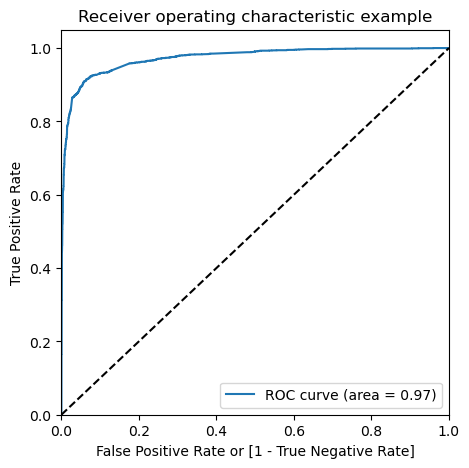

In [90]:
plt.style.use("default")
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### OBSERVATION:

- The area under the ROC curve is 0.97 which indicates a good model.

## Step 8: Finding Optimal Cutoff Point

- Earlier we chose an arbitrary cutoff value of 0.5. But, we need to further determine the best cut-off value for the model.

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [91]:
# Let's create columns with different probability cutoffs.

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.998139,5647,1,1,1,1,1,1,1,1,1,1,1
1,0,0.004723,8449,0,1,0,0,0,0,0,0,0,0,0
2,0,0.549778,1414,1,1,1,1,1,1,1,0,0,0,0
3,0,0.815512,8927,1,1,1,1,1,1,1,1,1,1,0
4,0,0.086321,3115,0,1,0,0,0,0,0,0,0,0,0


In [92]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379607  1.000000  0.000000
0.1   0.1  0.823201  0.973098  0.731481
0.2   0.2  0.909047  0.932325  0.894805
0.3   0.3  0.925004  0.917192  0.929784
0.4   0.4  0.928993  0.907945  0.941872
0.5   0.5  0.927876  0.885666  0.953704
0.6   0.6  0.930908  0.864229  0.971708
0.7   0.7  0.916387  0.811265  0.980710
0.8   0.8  0.903463  0.769651  0.985340
0.9   0.9  0.887985  0.719210  0.991255


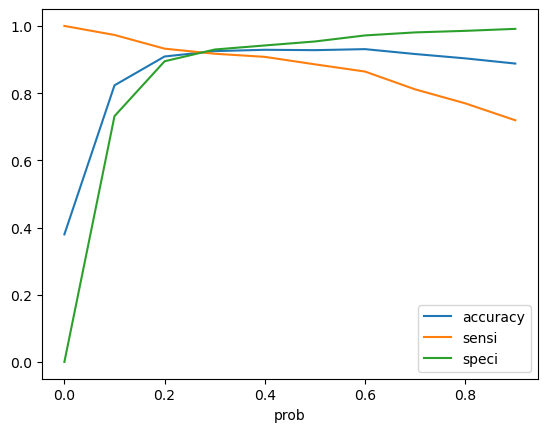

In [93]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [94]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.998139,5647,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.004723,8449,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.549778,1414,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.815512,8927,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.086321,3115,0,1,0,0,0,0,0,0,0,0,0,0


In [95]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.998139,5647,1,100
1,0,0.004723,8449,0,0
2,0,0.549778,1414,1,55
3,0,0.815512,8927,1,82
4,0,0.086321,3115,0,9


#### CONFUSION MATRIX

In [96]:
# Checking the confusion matrix again.

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion2

array([[3708,  180],
       [ 272, 2107]])

#### ACCURACY

In [97]:
#Let's calculate the overall Accuracy of the model.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9278761767991064


#### OTHER METRICS

In [98]:
TP = confusion[1,1] #True Positive
TN = confusion[0,0] #True Negative
FP = confusion[0,1] #False Positive
FN = confusion[1,0] #False Negative

#### SENSITIVITY

In [99]:
# Let's see the sensitivity of our logistic regression model.

TP / float(TP+FN)

0.885666246321984

#### SPECIFICITY

In [100]:
# Let us calculate specificity.

TN / float(TN+FP)

0.9537037037037037

#### OBSERVATION:

The above model evaluations give the following insights :

- The ROC Curve has a value of 0.97 which shows a good model.
- Accuracy : 92.79%
- Sensitivity : 88.57%
- Specificity : 95.37%

In [101]:
# Calculate false postive rate - predicting conversion when customer does not convert

print(FP/ float(TN+FP))

0.046296296296296294


In [102]:
# Positive predictive value 

print (TP / float(TP+FP))

0.9212942719720157


In [103]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9316582914572864


## STEP 9 : Making Predictions on Test Set

#### Scaling of the Test sets

In [104]:
num_cols= X_test.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [105]:
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7335,0.176471,0.199078,0.166667,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1681,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7295,0.117647,0.595853,0.222222,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8194,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
5431,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [106]:
X_test= X_test[col]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
7335,0.199078,0.166667,0,0,0,0,0,0,0,0,1,1,0
1681,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0
7295,0.595853,0.222222,0,0,0,0,0,0,0,0,0,1,0
8194,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0,0
5431,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0


In [107]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [108]:
y_test_pred = res.predict(X_test_sm)

In [109]:
y_test_pred[:10]

7335    0.302086
1681    0.035295
7295    0.192877
8194    0.376507
5431    0.035295
100     0.006769
8709    0.008910
3635    0.998125
2967    0.953730
2137    0.003701
dtype: float64

In [110]:
# Converting y_pred to a dataframe which is an array.

y_pred_1 = pd.DataFrame(y_test_pred)

In [111]:
# Let's see the head.

y_pred_1.head()

,0
7335,0.302086
1681,0.035295
7295,0.192877
8194,0.376507
5431,0.035295


In [112]:
# Converting y_test to dataframe.

y_test_df = pd.DataFrame(y_test)

In [113]:
# Putting Prospect ID to index.

y_test_df['Prospect ID'] = y_test_df.index

In [114]:
# Removing index for both dataframes to append them side by side .

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [115]:
# Appending y_test_df and y_pred_1.

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [116]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7335,0.302086
1,0,1681,0.035295
2,0,7295,0.192877
3,0,8194,0.376507
4,0,5431,0.035295


In [117]:
# Renaming the column.

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [118]:
# Rearranging the columns.

y_pred_final= y_pred_final[['Prospect ID', 'Converted', 'Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))

In [119]:
# Let's see the head of y_pred_final.

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,7335,0,0.302086,30
1,1681,0,0.035295,4
2,7295,0,0.192877,19
3,8194,0,0.376507,38
4,5431,0,0.035295,4


In [120]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [121]:
# Let's see the head of y_pred_final.

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_predicted
0,7335,0,0.302086,30,1
1,1681,0,0.035295,4,0
2,7295,0,0.192877,19,0
3,8194,0,0.376507,38,1
4,5431,0,0.035295,4,0


#### ACCURACY

In [122]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9151154132539091

#### CONFUSION MATRIX

In [123]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1532,  138],
       [  90,  926]])

#### OTHER METRICS

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### SENSITIVITY

In [125]:
# Let's see the sensitivity of our logistic regression model.

TP / float(TP+FN)

0.9114173228346457

#### SPECIFICITY

In [126]:
# Let us calculate specificity.

TN / float(TN+FP)

0.9173652694610779

#### OBSERVATION :

The analysis of the test data gives the following results:

- Accuracy : 91.51%
- Sensitivity : 91.14%
- Specificity : 91.74%

## STEP 10 : PRECISION - RECALL ANALYSIS

In [127]:
# Checking the Confusion Matrix once again.

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3708  180]
 [ 272 2107]]


#### PRECISION

In [128]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9212942719720157

#### RECALL

In [129]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.885666246321984

In [130]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9212942719720157

In [131]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.885666246321984

### Precision and recall tradeoff

In [132]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6262    1
 6263    0
 6264    1
 6265    0
 6266    0
 Name: Converted, Length: 6267, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6262    1
 6263    0
 6264    1
 6265    1
 6266    0
 Name: final_Predicted, Length: 6267, dtype: int64)

In [133]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

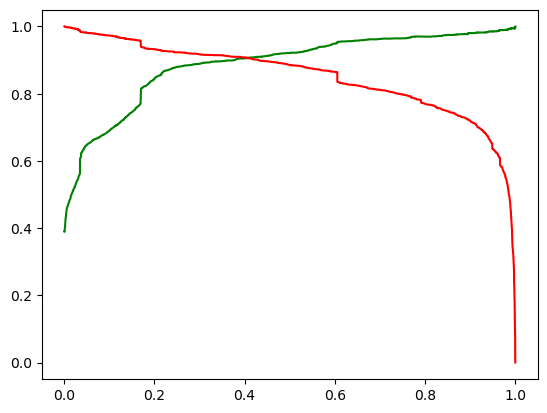

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score,final_predicted
0,1,0.998139,5647,1,1,1,1,1,1,1,1,1,1,1,1,100,1
1,0,0.004723,8449,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.549778,1414,1,1,1,1,1,1,1,0,0,0,0,1,55,1
3,0,0.815512,8927,1,1,1,1,1,1,1,1,1,1,0,1,82,1
4,0,0.086321,3115,0,1,0,0,0,0,0,0,0,0,0,0,9,0


In [136]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9151154132539091

In [137]:
# Creating the confusion metric again

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1532,  138],
       [  90,  926]])

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Precision 

TP/(TP+FP)

0.8703007518796992

In [140]:
# Recall

TP/(TP+FN)

0.9114173228346457

#### OBSERVATION:

- With the present cutoff as 0.41 the Precision value is 87.03% and Recall value is 91.14%.

## STEP 11 : Making Predictions on Test Set

In [141]:
y_test_pred = res.predict(X_test_sm)

In [142]:
# Converting y_pred to a dataframe which is an array

y_pred_df = pd.DataFrame(y_test_pred)

In [143]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [144]:
# Removing index for both dataframes to append them side by side. 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df and y_pred_df.
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [146]:
# Renaming column. 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [147]:
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.302086
1,0,0.035295
2,0,0.192877
3,0,0.376507
4,0,0.035295


In [148]:
# Making predictions uisng cut off of 0.41.

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x> 0.41 else 0)

In [149]:
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.302086,0
1,0,0.035295,0
2,0,0.192877,0
3,0,0.376507,0
4,0,0.035295,0
...,...,...,...
2681,0,0.035295,0
2682,0,0.169697,0
2683,1,0.999610,1
2684,0,0.035650,0


#### ACCURACY

In [150]:
# Checking the overall Accuracy.

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9218168279970216

#### CONFUSION MATRIX

In [151]:
# Creating confusion matrix.

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)
confusion2

array([[1562,  108],
       [ 102,  914]])

#### OTHER METRICS

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### SENSITIVITY

In [153]:
# Let's see the sensitivity of our logistic regression model.

TP / float(TP+FN)

0.8996062992125984

#### SPECIFICITY

In [154]:
# Let us calculate specificity.

TN / float(TN+FP)

0.9353293413173652

#### OBSERVATIONS:

The analysis of the test data gives the following results:

- Accuracy : 92.18%
- Sensitivity : 89.96%
- Specificity : 93.53%

## FINAL OBSERVATIONS:

#### OBSERVATIONS ON TRAIN DATA:

The above model evaluations give the following insights :

- The ROC Curve has a value of 0.97 which shows a good model.
- Accuracy : 92.79%
- Sensitivity : 88.57%
- Specificity : 95.37%
    
#### OBSERVATIONS ON TEST DATA:

The analysis of the test data gives the following results:

- Accuracy : 92.18%
- Sensitivity : 89.96%
- Specificity : 93.53%